## 주식 데이터를 로드해 주가 캔들 차트로 시각화 해보자
- **FinanceDataReader(FDR)** : 각종 금융 데이터 수집을 지원하는 라이브러리
- 깃헙 : https://financedata.github.io/
- **MplFinance** : 재무 데이터의 시각화 및 분석을 지원하는 라이브러리
- 깃헙 : https://github.com/matplotlib/mplfinance
  - 주식 차트에 맞는 캔들 차트를 활용
  - 캔들 차트에는 시가(주식장 시작 가격), 고가(일일 최고 가격), 저가(일일 최저 가격), 종가(주식장 마감 가격)를 일본 캔들 한 개씩으로 표현
  - 종가 > 시가 이면 양봉 캔들(빨간색) , 종가 < 시가 이면 음봉 캔들(파란색)
  - 시간에 따른 가격으로 차트를 표현해보자!

In [2]:
!pip install mplfinance

In [1]:
!pip install finance-datareader

### 주식 정보 확인

In [3]:
import FinanceDataReader as fdr

In [6]:
# 코스피 상장 주식 정보 출력
fdr.StockListing('KOSPI')

# Code : 국내 코스피 주식 종목 코드
# Close : 종가 / Open : 시가 / High : 고가 / Low : 저가
# Volume : 거래량
# Amount : 거래대금
# Marcap : 시가총액

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64400,1,700,1.10,63700,64700,63100,16615979,1064885035000,381224682176800,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,296000,2,-2500,-0.84,298500,299500,292500,2408422,709672874250,215488700040000,728002365,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,1034000,1,3000,0.29,1028000,1036000,1023000,30501,31371536500,73593916000000,71174000,STK
3,373220,KR7373220003,LG에너지솔루션,KOSPI,,312000,2,-4500,-1.42,315000,315500,311000,103156,32218250750,73008000000000,234000000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,53800,1,800,1.51,53100,53900,52700,1059957,56589844800,43899436923200,815974664,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,001527,KR7001522002,동양2우B,KOSPI,,9170,1,70,0.77,9010,9170,8910,304,2723930,2829577730,308569,STK
958,004415,KR7004411005,서울식품우,KOSPI,,1255,2,-1,-0.08,1255,1256,1254,826,1037388,2791747500,2224500,STK
959,014915,KR7014911002,성문전자우,KOSPI,,4640,2,-50,-1.07,4670,4695,4620,562,2602635,2784000000,600000,STK
960,001525,KR7001521004,동양우,KOSPI,,4295,1,55,1.30,4240,4300,4240,597,2557695,2653154645,617731,STK


In [7]:
# 미국 나스닥 상장 주식 정보 출력
fdr.StockListing('NASDAQ')

100%|████████████████████████████████████████████████████████████████████████████| 3664/3664 [00:02<00:00, 1307.94it/s]


,Symbol,Name,IndustryCode,Industry
0,NVDA,NVIDIA Corp,57101010,반도체
1,MSFT,Microsoft Corp,57201020,소프트웨어
2,AAPL,Apple Inc,57106020,전화 및 소형 장치
3,AMZN,Amazon.com Inc,53402010,백화점
4,META,Meta Platforms Inc,57201030,온라인 서비스
...,...,...,...,...
3659,LAWR,Robot Consulting Co Ltd ADR,57201020,소프트웨어
3660,OYSER,Oyster Enterprises II Acquisition Rights Exp 2...,55601010,투자 지주 회사
3661,SPEGU,Silver Pegasus Acquisition Units,55601010,투자 지주 회사
3662,GLIBA,GCI Liberty Inc,,


In [9]:
# 상장 주식 코드 및 티커 심볼 확인 사용자 정의 함수
def getStockCode(market='KOSPI', sort='Marcap') :
    df = fdr.StockListing(market)
    if market=='KOSPI' :
        df.sort_values(by=sort, ascending=False, inplace=True)
        return df[['Code', 'Name', 'Marcap']]    # 종목 코드, 회사명, 시총 반환
    elif market=='NASDAQ' :
        return df[['Symbol','Name']]    # 나스닥은 시총이 나오지 않아서 심볼과 이름으로만 출력

In [15]:
getStockCode()

,Code,Name,Marcap
0,005930,삼성전자,380928700280700
1,000660,SK하이닉스,214942698266250
2,207940,삼성바이오로직스,73593916000000
3,373220,LG에너지솔루션,72891000000000
4,005935,삼성전자우,43899436923200
...,...,...,...
957,001527,동양2우B,2829577730
958,004415,서울식품우,2791747500
959,014915,성문전자우,2784000000
960,001525,동양우,2656243300


In [11]:
getStockCode(sort='Volume')

,Code,Name,Marcap
439,008970,동양철관,283808023440
718,011300,성안머티리얼스,87612751025
699,071090,하이스틸,98635335835
0,005930,삼성전자,381816645969000
557,004140,동방,178454969520
...,...,...,...
916,204210,스타에스엠리츠,15927568525
829,025560,미래산업,47695445210
922,140910,에이리츠,13969290160
858,074610,이엔플러스,37494486519


In [12]:
getStockCode(market='NASDAQ')

100%|████████████████████████████████████████████████████████████████████████████| 3664/3664 [00:02<00:00, 1563.81it/s]


,Symbol,Name
0,NVDA,NVIDIA Corp
1,MSFT,Microsoft Corp
2,AAPL,Apple Inc
3,AMZN,Amazon.com Inc
4,META,Meta Platforms Inc
...,...,...
3659,LAWR,Robot Consulting Co Ltd ADR
3660,OYSER,Oyster Enterprises II Acquisition Rights Exp 2...
3661,SPEGU,Silver Pegasus Acquisition Units
3662,GLIBA,GCI Liberty Inc


### 종목별 주식 데이터 파악

- 국가별 지수

In [14]:
# 지난 1년간 코스피 지수 확인
 # DataReader : 특정 주식의 기간에 따른 가격, 거래량 등의 데이터를 DF로 출력하는 함수
 # (지수코드, 시작일, 종료일)
fdr.DataReader('KS11', '2024-07-15', '2025-07-15')

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2024-07-15,2869.15,2872.90,2848.93,2860.92,424457898,0.0014,1,3.92,12165673099287,2334446313431494
2024-07-16,2861.71,2872.21,2857.07,2866.09,677904823,0.0018,1,5.17,12660325755248,2338465518826864
2024-07-17,2865.90,2868.58,2841.33,2843.29,549094120,-0.0080,2,-22.80,13923509175223,2320318934867633
2024-07-18,2805.64,2824.35,2799.02,2824.35,658374570,-0.0067,2,-18.94,15548196201712,2304940336748129
2024-07-19,2800.21,2802.68,2776.99,2795.46,426207952,-0.0102,2,-28.89,9585234666046,2280949590315269
...,...,...,...,...,...,...,...,...,...,...
2025-07-09,3123.22,3137.17,3111.02,3133.74,642960883,0.0060,1,18.79,12654909764711,2563422971103981
2025-07-10,3144.14,3183.23,3133.81,3183.23,596571574,0.0158,1,49.49,14124821031009,2603739245288003
2025-07-11,3186.35,3216.69,3170.46,3175.77,465292057,-0.0023,2,-7.46,13342066116082,2598982928438423


In [16]:
# 25년도 나스닥 지수
fdr.DataReader('IXIC','2025')    # 년도만 작성하면 해당 년도 데이터만 출력됨

,Open,High,Low,Close,Volume,Adj Close
2024-12-31,19551.359375,19563.720703,19283.410156,19310.789062,8873030000,19310.789062
2025-01-02,19403.900391,19517.869141,19117.589844,19280.789062,8737550000,19280.789062
2025-01-03,19395.509766,19638.660156,19379.570312,19621.679688,8214050000,19621.679688
2025-01-06,19851.990234,20007.949219,19785.000000,19864.980469,9586840000,19864.980469
2025-01-07,19938.080078,19940.210938,19421.019531,19489.679688,13371130000,19489.679688
...,...,...,...,...,...,...
2025-07-09,20522.089844,20645.410156,20486.380859,20611.339844,9978310000,20611.339844
2025-07-10,20636.480469,20655.390625,20495.140625,20630.660156,9781380000,20630.660156
2025-07-11,20562.880859,20647.970703,20509.750000,20585.529297,8135800000,20585.529297
2025-07-14,20592.560547,20672.339844,20492.630859,20640.330078,8010060000,20640.330078


- 개별종목

In [18]:
# (종목코드 or 티커, 기간 or 년도)
fdr.DataReader('005930', '2025')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-01-02,52700,53600,52300,53400,16630538,0.003759
2025-01-03,52800,55100,52800,54400,19318046,0.018727
2025-01-06,54400,56200,54300,55900,19034284,0.027574
2025-01-07,56800,57300,55400,55400,17030235,-0.008945
2025-01-08,54800,57500,54700,57300,26593553,0.034296
...,...,...,...,...,...,...
2025-07-10,60600,61200,60400,61000,14768473,0.009934
2025-07-11,61300,62800,61200,62600,19140650,0.026230
2025-07-14,62300,62600,61800,62500,13563846,-0.001597


In [33]:
# datetime : 날짜와 시간을 다루는 모듈
 # timedelta : 두 날짜와 또는 시간간의 차이를 출력하는 함수
from datetime import datetime, timedelta

# 특정 주식의 시장 데이터를 읽어오는 사용자 함수 정의
def getData(code, dateStart, dateEnd) :
    df = fdr.DataReader(code, dateStart, dateEnd)
    return df

code = '005930'

# today().date() : 오늘 날짜의 년월일 출력
date_end = datetime.today().date()

date_start = date_end - timedelta(days=365)    # 매개변수는 weeks, days, houls, minutes 등 사용 가능

df = getData(code, date_start, date_end)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-07-16,86900,88000,86700,87700,16166688,0.011534
2024-07-17,87100,88000,86400,86700,18186490,-0.011403
2024-07-18,83800,86900,83800,86900,24721790,0.002307
2024-07-19,85600,86100,84100,84400,18569122,-0.028769
2024-07-22,84400,84900,82600,83000,18987560,-0.016588
...,...,...,...,...,...,...
2025-07-10,60600,61200,60400,61000,14768473,0.009934
2025-07-11,61300,62800,61200,62600,19140650,0.026230
2025-07-14,62300,62600,61800,62500,13563846,-0.001597


In [34]:
datetime.today().date()

datetime.date(2025, 7, 16)

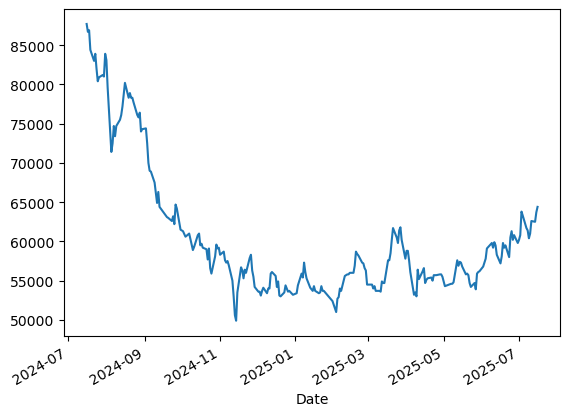

In [35]:
# 1년간 시간별 종가 라인차트 출력(삼성전자 기준)
 # plot : 라인차트 출력 함수
df['Close'].plot();   #matplotlib의 plt.plot()과 같음

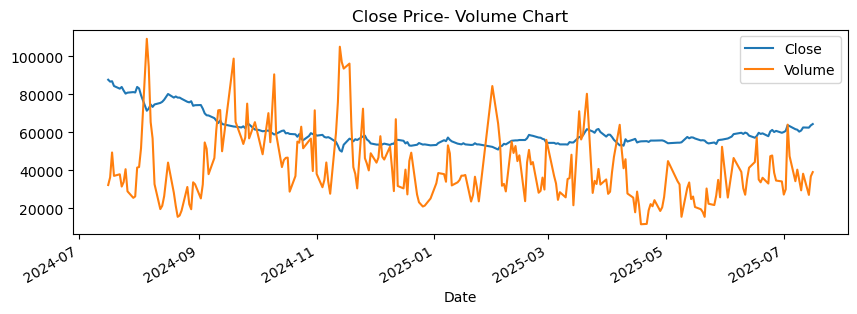

In [36]:
# 시간에 따른 주식가격, 거래량 비교 차트
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

df['Close'].plot()
(df['Volume']/500).plot()    # 일정 값으로 나눠서 보기 좋게 비율 변환

plt.title('Close Price- Volume Chart')
plt.legend()
plt.show()

### 캔들 차트 만들기

In [37]:
import mplfinance as mpf

<class 'matplotlib.figure.Figure'>
Figure(1200x700)

<class 'list'>
[<Axes: ylabel='Price'>, <Axes: >, <Axes: ylabel='Volume  $10^{6}$'>, <Axes: >]
4


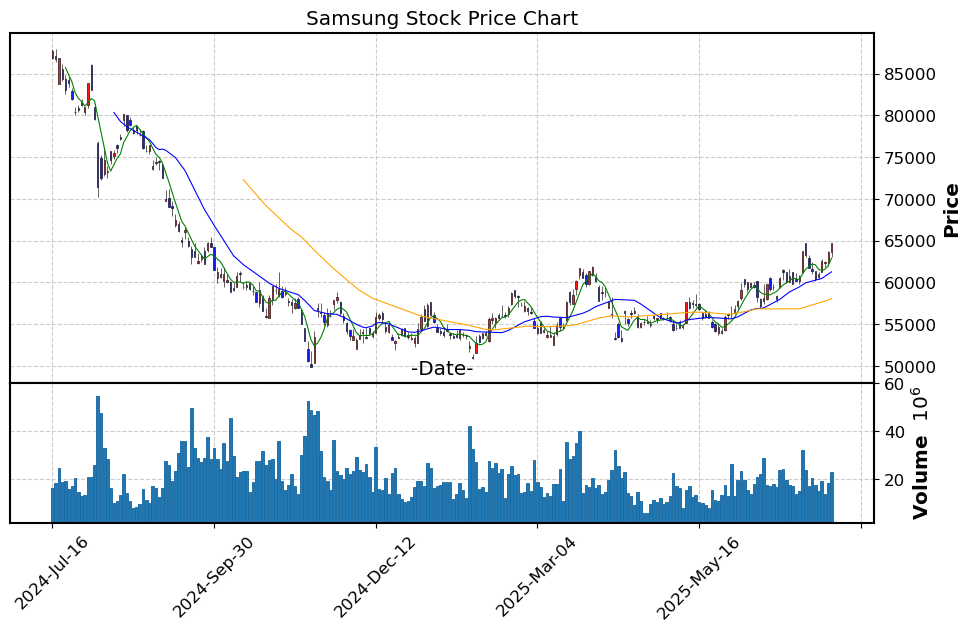

In [44]:
def getData(code, dateStart, dateEnd) :
    df = fdr.DataReader(code, dateStart, dateEnd)
    return df

code = '005930'

date_end = datetime.today().date()
date_start = date_end - timedelta(days=365)    
df = getData(code, date_start, date_end)

# 캔들 차트 생성을 위한 설정

# 차트 스타일
chart_style = 'classic'     # 'default', 'bunance', 'classic', 'yahoo'

# make_marketcolor : 차트 요소 세부 색상 지정 함수
# 양봉(up) 혹은 음봉(down)에 따른 색상 선택 - 양봉은 종가 > 시가 일때, 음봉은 종가 < 시가 일때 !
marketcolors = mpf.make_marketcolors(up='red', down='blue')

# make_mpf_style : 차트 요소 스타일 설정 함수(위에서 설정한 차트 스타일이나  캔들 색상 정의값을 넣어줌)
mpf_style = mpf.make_mpf_style(base_mpf_style=chart_style, marketcolors=marketcolors)

# plot : mpf에서 지원하는 차트 생성 함수 (차트객체, 축객체 반환)
fig, ax = mpf.plot(
    data = df,
    type = 'candle',
    style = mpf_style,       # 위에서 정의한 스타일 객체
    figsize = (12,7),    
    fontscale = 1.0,         # 폰트 상대 크기
    mav = (5, 20, 60),       # 이동평균선(Moving Average) - 5일선(1주), 20일선(1달), 60일선(3개월)
    mavcolors = ('green','blue','orange'),   # mav 별 색상 지정
    returnfig = True,        # fig객체 반환여부 설정
    volume = True            # 거래량 차트 출력여부 설정
)

print(type(fig))
print(fig)       # 전체 차트 크기
print()
print(type(ax))
print(ax)
print(len(ax))

ax[0].set_title('Samsung Stock Price Chart')                   #0,1    ~~> 0번,2번 씀. 리스트 이름에 1,3비어있음
ax[2].set_title('-Date-')                                      #2,3

plt.show()

In [39]:
# 차트 스타일 종류 확인
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

### Streamlit으로 대화형 대시보드를 구현해보자
- 원하는 정보를 다 입력하고 그래프에 적용되도록 sidebar에 폼 사용
- 세션을 활용하여 sidebar에서 입력받은 설정은 페이지 전반에 유지(다른 위젯이 추가되더라도 값이 유지되도록!)
- 캐시는 외부정보를 받아오는 함수들에 적용

In [10]:
%%writefile module/myApp26.py
import streamlit as st
import FinanceDataReader as fdr
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

st.subheader('추가 데이터 시각화')

#================================ 함수 설정 ================================
# 종목코드 및 기간 설정에 따른 DF 반환 함수
@st.cache_data
def getData(code, dateStart, dateEnd) :
    df = fdr.DataReader(code, dateStart, dateEnd)
    return df

# 시가총액을 기준으로 정렬된 종목코드, 회사명, 시총 반환 함수
@st.cache_data
def getStockCode(market='KOSPI', sort='Marcap') :
    df = fdr.StockListing(market)
    df.sort_values(by=sort, ascending=False, inplace=True)
    return df[['Code','Name', 'Marcap']]    # 종목 코드, 회사명, 시총 반환

# ~ > getData 및 getStockCode는 외부 대규모 데이터에서 값을 가져오기 때문에 캐시를 적용하여 효율을 높임
#===============================================================================


#===================================== 세션 설정 ================================

# not in 꼭 쓰기
# 44번 참고
# session_state에 종목코드 변경 시 활용 될 'code_index' 키 설정 (종목코드가 아니라 인덱스 번호)
if 'code_index' not in st.session_state :
    st.session_state['code_index'] = 0

# 기간 설정 시 활용될 'ndays' 키 설정
if 'ndays' not in st.session_state :
    st.session_state['ndays'] = 365                   # 기간은 수치값이므로 0이나 원하는 숫자를 초기값으로 지정

# 차트 스타일을 변경할 수 있는 'chart_style' 키 설정
if 'chart_style' not in st.session_state :
    st.session_state['chart_style'] = 'default'       # 차트 스타일이 문자열이므로 빈 문자열이나 원하는 기본 차트 형식을 초기값으로 지정

# 거래량 출력 여부를 결정할 수 있는 'volume' 키 설정
if 'volume' not in st.session_state :
    st.session_state['volume'] = True                 # 거래량 출력 여부를 결정하는 값이므로 논리값이 들어가면 됨
#===============================================================================


#===================================== 사이드바 설정 ================================
# 사이드바에서 여러 요소들을 입력받아 메인의 차트로 출력할 수 있도록 폼으로 구성

with st.sidebar.form(key='form1', clear_on_submit=True) :
    st.header('입력값 설정')
    ''
    # 종목코드 선택을 위한 selectbox 만들기
     # 종목코드와 회사명을 같이 출력시키기 위해 1:1로 매핑 시켜주기 
     # zip : 순서가 있고 길이가 같은 두 집합에서 같은 순서의 값들을 튜플로 묶어주는 함수
    choice_tuple = zip(getStockCode()['Code'], getStockCode()['Name'])
    # 종목코드(문자열)와 회사명(문자열)을 ' : '로 하나의 문자열로 이어서 리스트에 저장
    choices_list = [' : '.join(i) for i in choice_tuple] 

    # index는 선택박스와 초기값(session_state의 code_index에는 0으로 초기화 되어 있는 상태라서 시총이 가장 높은 삼성전자가 나오게 됨)
     # (getStockCode의 sort 기준을 바꾸게 되면 또 다른 값이 나올 수 있음)
    choice = st.selectbox('종목', choices_list, index=st.session_state['code_index'])
    # choice는 문자열을 받아주고 'code_index'는 정수값이라 맞지 않음
    code_index = choices_list.index(choice)     # 리스트 내부 특정값의 인덱스 번호 추출
    code = choice.split(' : ')[0]   # 주식코드만 추출(기존에 주식코드 : 회사명 으로 문자열이 지정되어 있었는데 코드만 추출하여 code 변수에 저장)
    ''
    # 2. 기간을 설정할 수 있는 슬라이더 만들기
     # value는 초기값으로 세션에 저장된 365일이 기본 적용
    ndays = st.slider('기간(days) :', min_value=5, max_value=720, value=st.session_state['ndays'], step=1)
    ''
    # 3. 차트 스타일 목록 및 선택 박스 만들기
    chart_style_list = ['binance', 'binancedark', 'blueskies', 'brasil','charles', 'checkers', 'classic', 'default',
                        'ibd', 'kenan','mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']
    # index인자로 초기값을 설정(초기값은 session의 chart_style에 있는 'default'가 들어감)
    chart_style = st.selectbox('차트 스타일 :', chart_style_list, index=chart_style_list.index(st.session_state['chart_style']))
    ''
    # 4. 거래량 설정 체크 박스 만들기 (기본값은 True)
    volume = st.checkbox('거래량', value=st.session_state['volume'])

    # 5. 폼 제출 버튼(누르면 session_state에 데이터 값들을 업데이트 후 새로고침 되게 설정)
    if st.form_submit_button('입력!') :
        st.session_state['code_index'] = code_index
        st.session_state['ndays'] = ndays
        st.session_state['chart_style'] = chart_style
        st.session_state['volume'] = volume
        st.rerun()
#===============================================================================


#===================================== 메인 화면 설정 ================================
# plotChart함수는 차트를 생성하는 함수인데 항상 입력값이 달라질 것이기 때문에 캐시 적용 x
def plotChart(data) :
    chart_style = st.session_state['chart_style']     # 유저가 선택한 값으로 차트 스타일 설정 
    marketcolors = mpf.make_marketcolors(up='red', down='blue')
    mpf_style = mpf.make_mpf_style(base_mpf_style=chart_style, marketcolors=marketcolors)
    
    fig, ax = mpf.plot(
        data = data,      # DF형태로 입력
        type = 'candle',
        style = mpf_style,     
        figsize = (12,7),    
        fontscale = 1.0,      
        mav = (5, 20, 60),      
        mavcolors = ('green','blue','orange'),   
        returnfig = True,      
        volume = st.session_state['volume']   # 유저가 선택하면 거래량 출력(선택하지 않으면 미출력)     
    )
    return st.pyplot(fig)

date_end = datetime.today().date()
date_start = date_end - timedelta(days=st.session_state['ndays'])   # 유저가 선택한 기간을 입력    
df = getData(code, date_start, date_end)     # 매개변수의 code가 위에서 작성한 종목코드 추출하는 코드 ~> code = choice.split(' : ')[0]  

# 현재 지정되어 있는 code_index값으로 choices_list에 있는 값을 인덱싱하고 기업명만 슬라이싱
chart_title = choices_list[st.session_state['code_index']][9:]    # 코스피 종목 코드는 6자리이며 공백과 : 을 포함하면 종목 명은 9번째 인덱스부터 출력됨
st.write('현재 차트 ➡️', chart_title)
st.write('이동평균선(mav): :green[5일], :blue[20일], :orange[60일]' )

'주가 차트 출력'
plotChart(df)

Overwriting module/myApp26.py
